<a href="https://colab.research.google.com/github/vaishnavi1053/OIBSIP/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2: Unemployment analysis with python**

## **1. Import the required libraries**

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## **2.Load the dataset**

In [ ]:
#loading and reading the data set
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [ ]:
#information about the data
df.info


<bound method DataFrame.info of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98

In [ ]:
#checking for null values
print(df.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [ ]:
#renaming the columns
df.columns = ["State","Date","Frequency","Estimated Unemployment Rate(%)","Estimated Employed",
              "Estimated Labour Participation Rate(%)","Region","longitude","latitude"]
print(df)

              State         Date Frequency  Estimated Unemployment Rate(%)  \
0    Andhra Pradesh   31-01-2020         M                            5.48   
1    Andhra Pradesh   29-02-2020         M                            5.83   
2    Andhra Pradesh   31-03-2020         M                            5.79   
3    Andhra Pradesh   30-04-2020         M                           20.51   
4    Andhra Pradesh   31-05-2020         M                           17.43   
..              ...          ...       ...                             ...   
262     West Bengal   30-06-2020         M                            7.29   
263     West Bengal   31-07-2020         M                            6.83   
264     West Bengal   31-08-2020         M                           14.87   
265     West Bengal   30-09-2020         M                            9.35   
266     West Bengal   31-10-2020         M                            9.98   

     Estimated Employed  Estimated Labour Participation Rate(%)

# **3. Data visualization**

<ipython-input-7-6c2fc92df193>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid") #seaborn-whitegrid is used for background and gridline
<ipython-input-7-6c2fc92df193>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<function matplotlib.pyplot.show(close=None, block=None)>

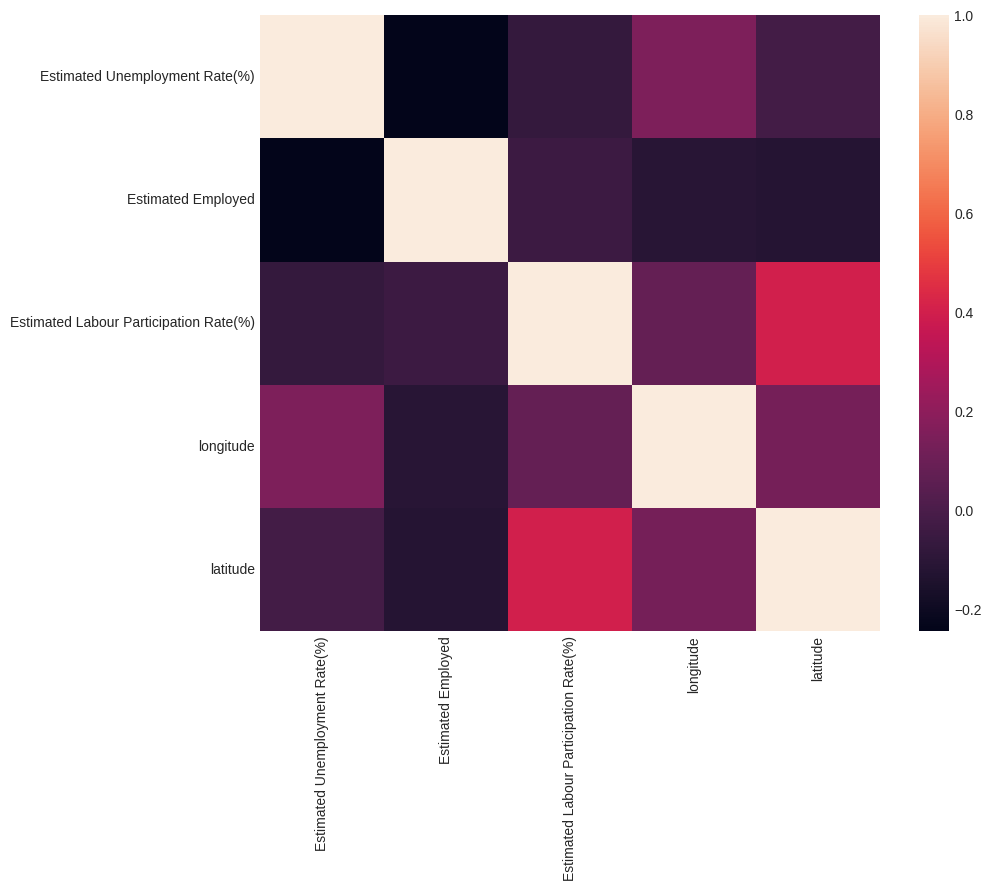

In [ ]:
#checking correlation within the dataset
plt.style.use("seaborn-whitegrid") #seaborn-whitegrid is used for background and gridline
plt.figure(figsize =(10,8)) #size of the plot
sns.heatmap(df.corr())
plt.show


###**a.Analyse the data to estimate the number of employed people with respect to regions of India**

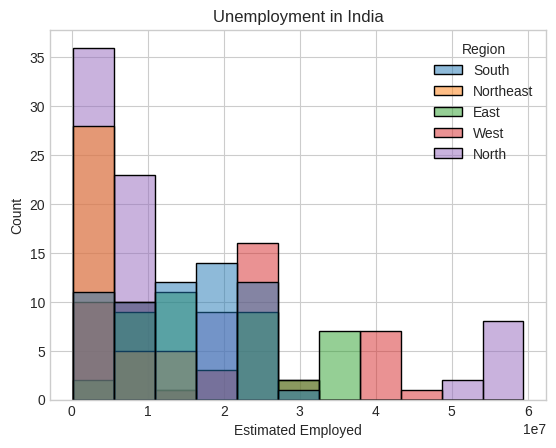

In [ ]:
#plot of unemployement rate in regions of India
df.columns = ["State","Date","Frequency","Estimated Unemployment Rate(%)","Estimated Employed",
              "Estimated Labour Participation Rate(%)","Region","longitude","latitude"]
plt.title("Unemployment in India")
sns.histplot(x="Estimated Employed",hue = "Region", data = df) #hue is used for colorbars in histogram
plt.show()

### **b.Analyse the data based on unemployment in regions of India**

<Axes: title={'center': 'Unemployment in India'}, xlabel='Estimated Unemployment Rate(%)', ylabel='Count'>

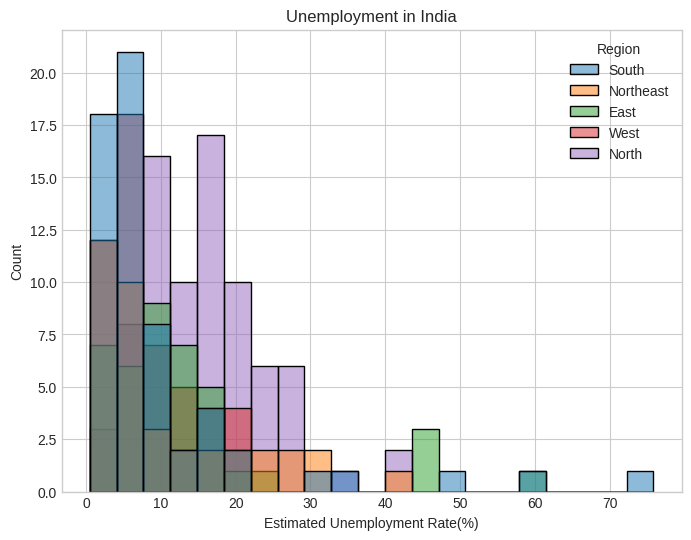

In [ ]:
plt.figure(figsize =(8,6))
plt.title("Unemployment in India")
sns.histplot(x="Estimated Unemployment Rate(%)" , hue ="Region" , data=df)

### **c.Creating a dashboard to analyse unemployment rate in India**

In [ ]:
unemployment = df[["State","Region","Estimated Unemployment Rate(%)"]]
figure = px.sunburst(unemployment ,path=["Region","State"] ,
                     values ="Estimated Unemployment Rate(%)",width=700 ,height=700,
                     color_continuous_scale ="RdylGn" , title ="Unemployment rate of India"
                     )
figure.show()